In [1]:
import pandas as pd

In [2]:
cars = pd.read_csv("cars-dataset.csv")
cars.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


#### EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points


In [3]:
cars.describe(include='all')

,car name,cyl,disp,hp,wt,acc,yr,mpg
count,398,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000
unique,305,NaN,NaN,94,NaN,NaN,NaN,NaN
top,ford pinto,NaN,NaN,150,NaN,NaN,NaN,NaN
freq,6,NaN,NaN,22,NaN,NaN,NaN,NaN
mean,NaN,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,23.514573
std,NaN,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,7.815984
min,NaN,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,9.000000
25%,NaN,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,17.500000
50%,NaN,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,23.000000
75%,NaN,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,29.000000


In [4]:
cars.isna().any() #There are no null values

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool

In [5]:
cars.dtypes # This shows hp as an object data type, so there is a chance of non-numeric values

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [6]:
cars['hp']=pd.to_numeric(cars.hp,errors='coerce')

In [7]:
cars['hp'].dtypes


dtype('float64')

In [8]:
cars[cars['hp'].isna()] # 6 rows with NaN exist

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,NaN,2046,19.0,71,25.0
126,ford maverick,6,200.0,NaN,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,NaN,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,NaN,2905,14.3,80,23.6
354,renault 18i,4,100.0,NaN,2320,15.8,81,34.5
374,amc concord dl,4,151.0,NaN,3035,20.5,82,23.0


In [9]:
cars.dropna(inplace=True)

In [10]:
cars.shape #removed 6 rows

(392, 8)

In [11]:
#As this problem statement is to find MPG & we are using unsupervized techniques.
#I'm removing target column i.e MPG
ucars = cars.drop(columns='mpg')
ucars.set_index('car name',inplace=True)

In [12]:
import matplotlib.pyplot as plt

#['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']:

ucars.boxplot(column='cyl'); #no outliers


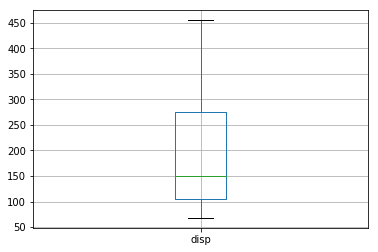

In [13]:
ucars.boxplot(column='disp');#no outliers



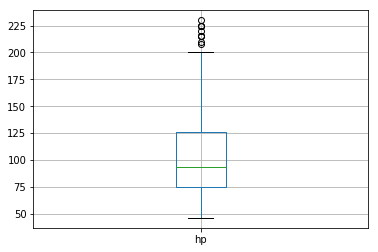

In [14]:
ucars.boxplot(column='hp'); # outliers are present


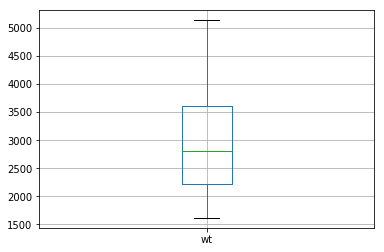

In [15]:
ucars.boxplot(column='wt'); # no outliers


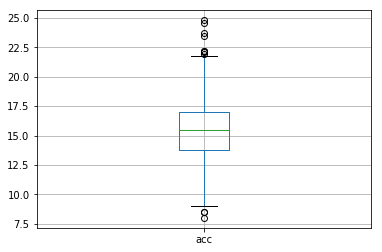

In [16]:
ucars.boxplot(column='acc'); # outliers are present


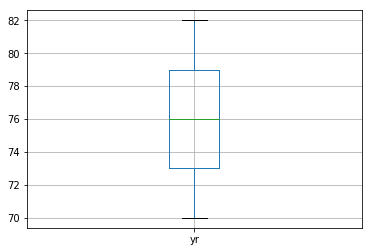

In [17]:
ucars.boxplot(column='yr'); #no outliers


In [18]:
#Removing outliers
def IQR(column):
    q1 = ucars[column].quantile(.25)
    q3 = ucars[column].quantile(.75)
    IQR = q3-q1
    print("IQR : {}".format(IQR))
    upper = q3+(1.5*IQR)
    lower = q1-(1.5*IQR)
    print("upper cap : {}".format(upper))
    print("lower cap : {}".format(lower))

In [19]:
IQR('hp')

IQR : 51.0
upper cap : 202.5
lower cap : -1.5


In [20]:
ucars.hp.min()

46.0

In [21]:
ucars['hp'] = ucars.hp.map(lambda x : 202.5 if x > 202.5 else x)

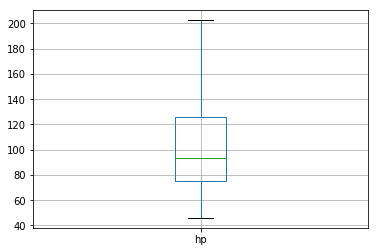

In [22]:
ucars.boxplot(column='hp'); #outliers are treated

In [23]:
IQR('acc')

IQR : 3.2499999999999964
upper cap : 21.89999999999999
lower cap : 8.900000000000007


In [24]:
ucars['acc'] = ucars.acc.map(lambda x : 21.8 if x > 21.8 else (8.91 if x < 8.9 else x))

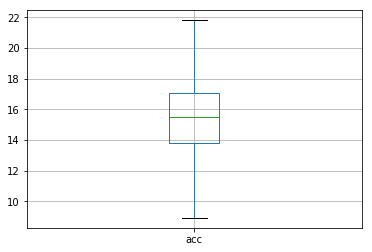

In [25]:
ucars.boxplot(column='acc'); #outliers are removed

#### Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

In [26]:
import seaborn as sns

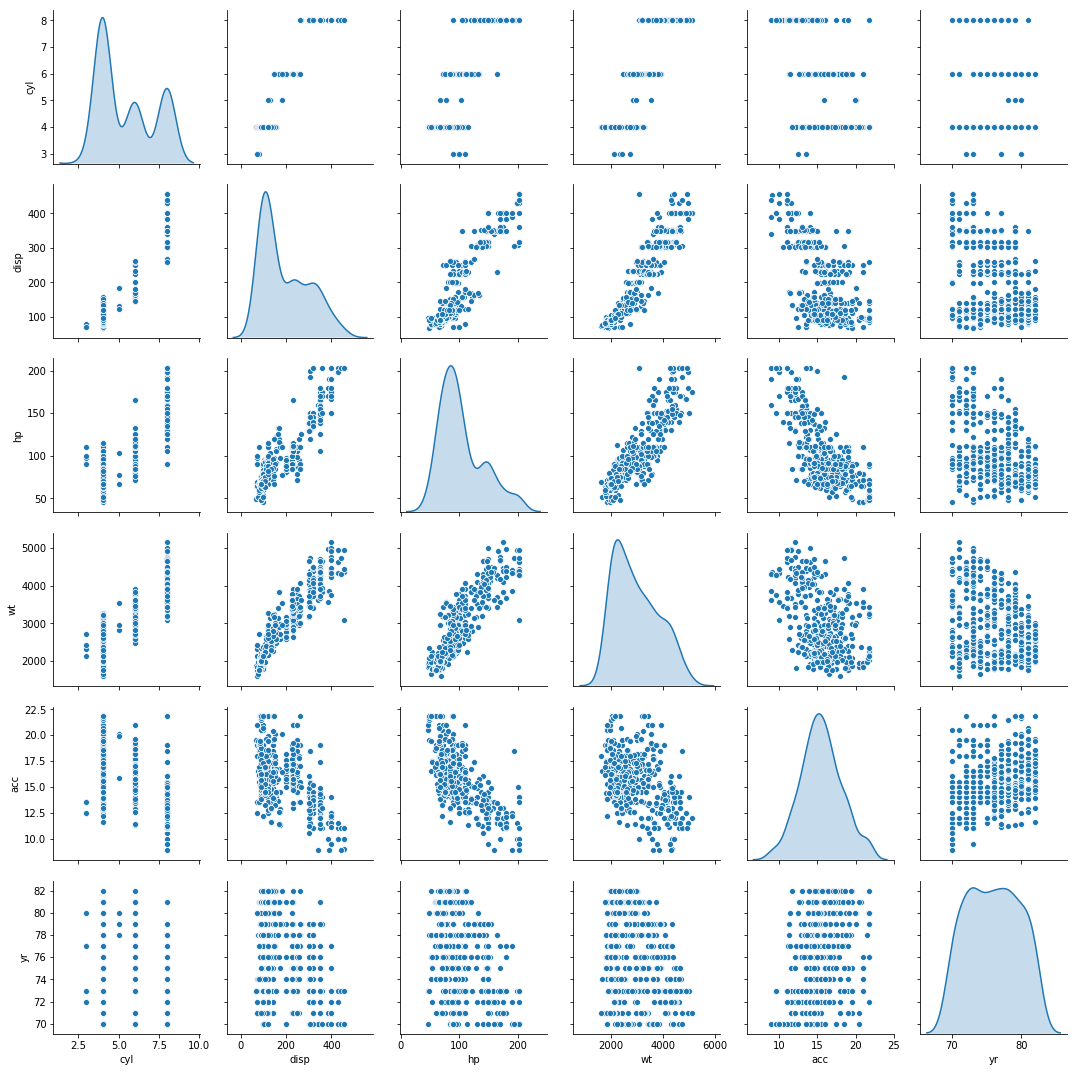

In [27]:
sns.pairplot(ucars,diag_kind='kde');

In [28]:
#From the columns cyl,disp we can see that there are 3 peaks i.e there are minimum 3 clusters present in the data
#Strong postivie correlation between below columns
#    disp - hp , disp -wt , hp -wt 
#Strong negative correlation between below columns
#    hp - acc , disp -acc
# other column pairs have very less correlation / no correlation

#### Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)


In [29]:
from sklearn.cluster import KMeans

In [30]:
#standardize the data
from scipy.stats import zscore
ucars = ucars.apply(zscore)

In [31]:
inertia = []
print("k-value : Inertia")
for i in range(2,20):
    model = KMeans(n_clusters=i, random_state=8)
    model.fit(ucars)
    inertia.append(model.inertia_)
    print("    {}  : {}".format(i,model.inertia_))


k-value : Inertia
    2  : 1041.1535710163425
    3  : 782.4343448875757
    4  : 619.8423430941018
    5  : 547.6165450075007
    6  : 480.88767153447316
    7  : 432.3413292133988
    8  : 389.19005167302134
    9  : 358.389782805798
    10  : 331.1966968943713
    11  : 310.47986418854276
    12  : 301.52375187083146
    13  : 277.8304879057607
    14  : 270.2072201564388
    15  : 252.79027454565383
    16  : 244.55575215220168
    17  : 233.5407851522276
    18  : 223.67796516085687
    19  : 213.5600340754611


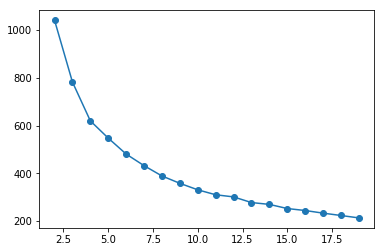

In [32]:
plt.plot(range(2,20),inertia,marker='o');

In [33]:
#There is no decrease in the inertia after 3/4 clusters , i'm considering optimnal clusters = 3

In [34]:
model = KMeans(n_clusters=3, random_state=8)
model.fit(ucars)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=8, tol=0.0001, verbose=0)

In [35]:
ucars['class'] = model.labels_


In [36]:
ucars

,cyl,disp,hp,wt,acc,yr,class
car name,,,,,,,
chevrolet chevelle malibu,1.483947,1.077290,0.696416,0.620540,-1.317688,-1.625315,2
buick skylark 320,1.483947,1.488732,1.635835,0.843334,-1.504929,-1.625315,2
plymouth satellite,1.483947,1.182542,1.233227,0.540382,-1.692170,-1.625315,2
amc rebel sst,1.483947,1.048584,1.233227,0.536845,-1.317688,-1.625315,2
ford torino,1.483947,1.029447,0.964821,0.555706,-1.879411,-1.625315,2
ford galaxie 500,1.483947,2.244637,2.521572,1.607198,-2.066652,-1.625315,2
chevrolet impala,1.483947,2.483848,2.642355,1.622523,-2.441133,-1.625315,2
plymouth fury iii,1.483947,2.349890,2.642355,1.573013,-2.474837,-1.625315,2
pontiac catalina,1.483947,2.493416,2.642355,1.706218,-2.066652,-1.625315,2


#### Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)


In [37]:
ucars['mpg'] = cars.set_index('car name')['mpg']

In [38]:
ucars.head()

,cyl,disp,hp,wt,acc,yr,class,mpg
car name,,,,,,,,
chevrolet chevelle malibu,1.483947,1.077290,0.696416,0.620540,-1.317688,-1.625315,2,18.0
buick skylark 320,1.483947,1.488732,1.635835,0.843334,-1.504929,-1.625315,2,15.0
plymouth satellite,1.483947,1.182542,1.233227,0.540382,-1.692170,-1.625315,2,18.0
amc rebel sst,1.483947,1.048584,1.233227,0.536845,-1.317688,-1.625315,2,16.0
ford torino,1.483947,1.029447,0.964821,0.555706,-1.879411,-1.625315,2,17.0


In [39]:
cars0 = ucars[ucars['class'] == 0]
cars1 = ucars[ucars['class'] == 1]
cars2 = ucars[ucars['class'] == 2]


In [40]:
print(cars0.shape,cars1.shape,cars2.shape)

(205, 8) (92, 8) (95, 8)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
c0 = LinearRegression()
c1 = LinearRegression()
c2 = LinearRegression()

In [43]:
X0,y0 = cars0.drop(columns='mpg'),cars0['mpg']
X1,y1 = cars1.drop(columns='mpg'),cars1['mpg']
X2,y2 = cars2.drop(columns='mpg'),cars2['mpg']

In [44]:
X0_train,X0_test,y0_train,y0_test = train_test_split(X0,y0,test_size=0.2, random_state=8)
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2, random_state=8)
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2, random_state=8)

In [45]:
c0.fit(X0_train,y0_train)
c1.fit(X1_train,y1_train)
c2.fit(X2_train,y2_train);


In [46]:
#Training accuracies
print(c0.score(X0_train,y0_train))
print(c1.score(X1_train,y1_train))
print(c2.score(X2_train,y2_train))

0.6958082284773007
0.4898587764207422
0.566598371365115


In [47]:
#Testing accuracies
print(c0.score(X0_test,y0_test))
print(c1.score(X1_test,y1_test))
print(c2.score(X2_test,y2_test))

0.7336061868353136
0.4175589324523873
0.6040087554070319


In [48]:
c0.coef_

array([ 8.02133253, -4.87029484, -3.30878392, -4.80919369, -0.15291977,
        3.26502727,  0.        ])

In [49]:
c1.coef_

array([ 1.86547113, -0.49296367, -2.46347002, -2.85008943, -0.66247335,
        2.14249324,  0.        ])

In [50]:
c2.coef_

array([-3.62814491, -0.33233512, -1.31755321, -0.95101007, -1.38984547,
        1.27640565,  0.        ])

In [51]:
pd.DataFrame([c0.coef_[:-1],c1.coef_[:-1],c2.coef_[:-1]],columns=['cyl', 'disp', 'hp', 'wt', 'acc', 'yr',])

,cyl,disp,hp,wt,acc,yr
0,8.021333,-4.870295,-3.308784,-4.809194,-0.152920,3.265027
1,1.865471,-0.492964,-2.463470,-2.850089,-0.662473,2.142493
2,-3.628145,-0.332335,-1.317553,-0.951010,-1.389845,1.276406
